# Installation

In [ ]:
!pip install paddlepaddle-gpu==2.3.2 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.0/394.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.1/383.1 KB 17.8 MB/s eta 0:00:00


In [ ]:
%%shell
# Clone PaddleDetection repository
git clone https://github.com/PaddlePaddle/PaddleDetection.git

# Install other dependencies
cd PaddleDetection
pip install -r requirements.txt

# Compile and install paddledet
python setup.py install

Cloning into 'PaddleDetection'...
remote: Enumerating objects: 255917, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 255917 (delta 19), reused 23 (delta 10), pack-reused 255863
Receiving objects: 100% (255917/255917), 414.68 MiB | 24.05 MiB/s, done.
Resolving deltas: 100% (208847/208847), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 65.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 KB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319

In [ ]:
%cd /content/PaddleDetection

/content/PaddleDetection


In [ ]:
!python ppdet/modeling/tests/test_architectures.py

/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/lo

# Demo

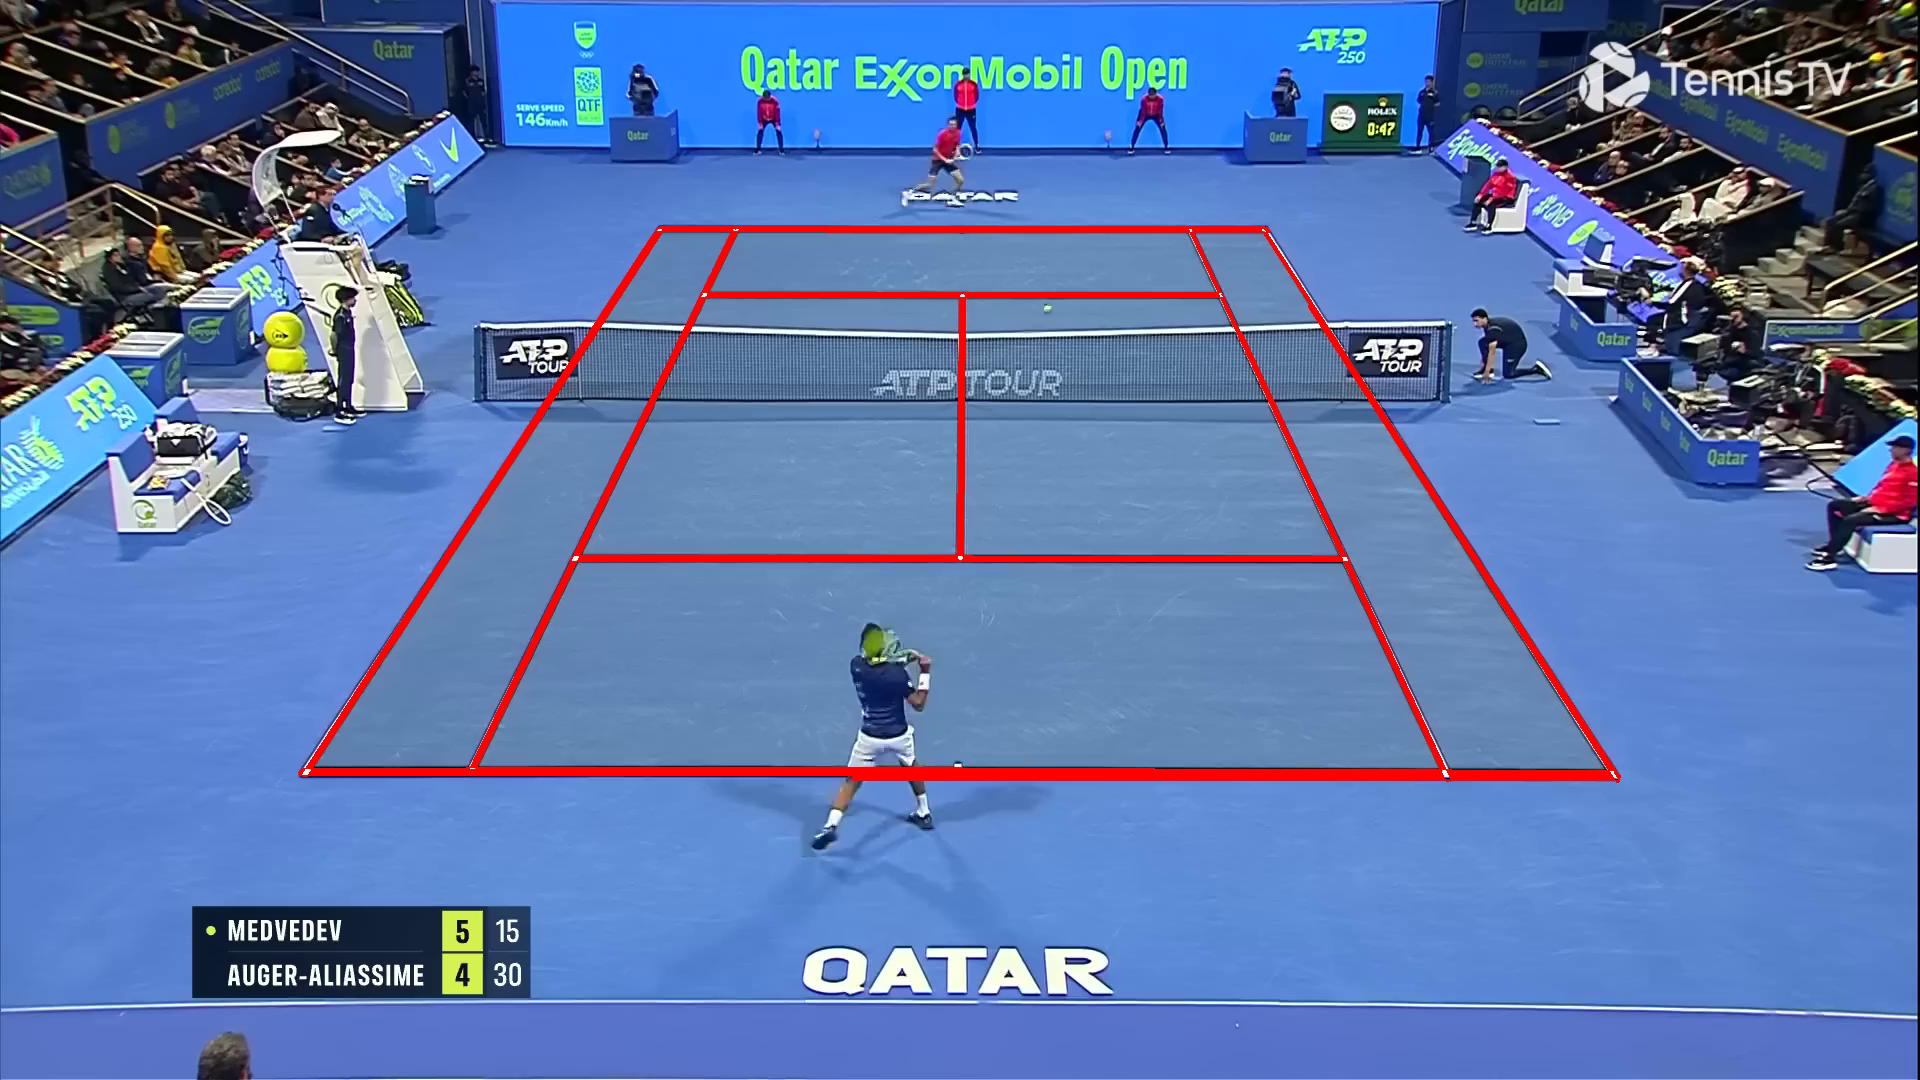

In [ ]:
import cv2
import math
import math
import numpy as np
from google.colab.patches import cv2_imshow

# Open the video file
# Load the video file or webcam stream
cap = cv2.VideoCapture('/content/input.mp4')  # for video file

# Load the image
# img = cv2.imread('image.png')
def show_img(img):
    cv2.imshow('img', img)
    cv2.waitKey(0)


def get_distance(line, p):
    A = line[1] - line[3]
    B = line[2] - line[0]
    C = line[0] * line[3] - line[2] * line[1]

    dist = abs(A * p[0] + B * p[1] + C) / np.sqrt(A**2 + B**2)
    return dist


def preprocess(img, max_iters=10):
    pimg = cv2.dilate(img, np.ones((11, 11)), iterations=2)
    pimg = cv2.erode(pimg, np.ones((11, 11)), iterations=2)
    return pimg


def get_line_len(line):
    return np.sqrt((line[0] - line[2]) ** 2 + (line[1] - line[3]) ** 2)


# def detect_hoz_court_lines(img):
#     h, w = img.shape[:2]
#     line_width = 5
#     line_len = int(w / 2)
#     centroid = (w // 2, h // 2)
#     for i in range()


def is_within_range(angle, axis):
    if axis == 'x':
        return (-10 <= angle <= 10)
    elif axis == 'y':
        return (-50 <= angle <= 50)


def filter_lines(lines):
    hoz_lines = []
    ver_lines = []
    for line in lines:
        x1, y1, x2, y2 = line
        if x2 - x1 != 0:
            angle_x = abs(math.atan((y2 - y1) / (x2 - x1))) * 180 / math.pi
            if is_within_range(angle_x, 'x'):
                hoz_lines.append(line)
        if y2 - y1 != 0:
            angle_y = abs(math.atan((x2 - x1) / (y2 - y1))) * 180 / math.pi
            if is_within_range(angle_y, 'y'):
                ver_lines.append(line)
    return hoz_lines, ver_lines


def get_line_len(cnt):
    x, y, w, h = cv2.boundingRect(cnt)
    return np.sqrt(w**2 + h**2)


def check_line_intersect(line1, line2):
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2

    # Compute the intersection point of the two lines
    px = ((x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4))/((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
    py = ((x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4))/((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))

    # Check if the intersection point lies on both lines
    if (px < max(min(x1,x2),min(x3,x4))) or (px > min(max(x1,x2),max(x3,x4))):
        return False
    if (py < max(min(y1,y2),min(y3,y4))) or (py > min(max(y1,y2),max(y3,y4))):
        return False

    return True


def intersection(l1, l2):
    (x, y), delta = l1
    x1, y1, x2, y2 = l2
    # Calculate the slope of the second line
    m2 = (y2 - y1) / (x2 - x1)

    # Calculate the intercept coefficient of the first and second lines
    b1 = y - delta * x
    b2 = y1 - m2 * x1

    # Calculate intersection coordinates
    xi = (b2 - b1) / (delta - m2)
    yi = delta * xi + b1

    return int(xi), int(yi)


def check_cnt_intersect(img, l1, l2):
    img1 = np.zeros_like(img)
    img2 = np.zeros_like(img)
    cv2.drawContours(img1, [l1], -1, 255, -1)
    cv2.drawContours(img2, [l2], -1, 255, -1)
    return np.any(cv2.bitwise_and(img1, img2) > 0)


def get_cnt_and_line_intersection(img, line, cnt):
    img1 = np.zeros_like(img)
    img2 = np.zeros_like(img)
    cv2.line(img1, line[0], line[1], 255, 3)
    cv2.drawContours(img2, [cnt], -1, 255, -1)
    mask = cv2.bitwise_and(img1, img2)
    cnt = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0][0]
    x, y, w, h = cv2.boundingRect(cnt)
    return x + w // 2, y + h // 2


def calc_avg_slope(cnts):
    bboxes = [cv2.boundingRect(cnt) for cnt in cnts]
    slopes = [b[3] / b[2] for b in bboxes]
    return np.mean(slopes)


def cnt_to_line(cnt):
    x, y, w, h = cv2.boundingRect(cnt)
    cnt_img = np.zeros((h, w), dtype=np.uint8)
    cnt = np.array(cnt)
    cnt -= np.array([x, y])
    cv2.drawContours(cnt_img, [cnt], -1, 255, -1)

    dig_len = np.sqrt(w**2 + h**2)
    diag_img1 = np.zeros((h, w), dtype=np.uint8)
    cv2.line(diag_img1, (0, 0), (w, h), 255, 1)
    ratio = (cv2.bitwise_and(diag_img1, cnt_img) > 0).sum() / dig_len
    if ratio > 0.8:
        return


def line_to_cnt(img, line):
    binary_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    cv2.line(binary_img, line[0], line[1], 255, 6)
    cnt = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0][0]
    return cnt


final_court_lines = []
court_line_color = (0, 0, 255)
net_color = (0, 255, 0)

while True:
    ret, img = cap.read()
    break


src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(src, (7, 7), 0)
dst = cv2.Canny(blur, 50, 200, None, 3)

dst = preprocess(dst)

cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

dstP = np.copy(cdst)
# Lets apply Probabilistic Line Transform to detect lines

h, w = img.shape[:2]
lines = cv2.HoughLinesP(dst, 1, np.pi / 180, w // 5, None, w // 10, 50)

cx, cy = w // 2, h // 2
if lines is not None:
    new_lines = []
    for line in lines:
        l = line[0]
        new_lines.append(l)

binary_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
hoz_lines, ver_lines = filter_lines(new_lines)
for l in hoz_lines:
    cv2.line(binary_img, (l[0], l[1]), (l[2], l[3]), 255, 2)

cnts = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]
candidates = sorted(cnts, key=lambda x: get_line_len(x))[::-1][:20]  # sort by width

hoz_court_lines = []
for candidate in candidates:
    bx, by, bw, bh = cv2.boundingRect(candidate)
    if bh < 20:
        hoz_court_lines.append(candidate)

sorted_hoz_court_lines = sorted(hoz_court_lines, key=lambda x: get_line_len(x))[::-1]
lowest_court_line = sorted_hoz_court_lines[0]
final_court_lines.append(lowest_court_line)

other_hoz_candidates = sorted_hoz_court_lines[1:]
# cv2.drawContours(img, [lowest_court_line], -1, court_line_color, -1)

# Proceed vertical lines
binary_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
for l in ver_lines:
    cv2.line(binary_img, (l[0], l[1]), (l[2], l[3]), 255, 2)
# binary_img = cv2.dilate(binary_img, np.ones((11, 11)), iterations=1)
cnts = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]
candidates = sorted(cnts, key=lambda x: get_line_len(x))[::-1][:20]  # sort by height

ver_court_lines = []
for candidate in candidates:
    if check_cnt_intersect(binary_img, lowest_court_line, candidate):
        ver_court_lines.append(candidate)
        final_court_lines.append(candidate)
ver_court_lines = sorted(ver_court_lines, key=lambda x: cv2.boundingRect(x)[0])  # TODO: check ver_court_lines valid

# cv2.drawContours(img, ver_court_lines, -1, court_line_color, -1)

other_ver_lines = []
for other_hoz_candidate in other_hoz_candidates:
    if (check_cnt_intersect(binary_img, other_hoz_candidate, ver_court_lines[1])
        and check_cnt_intersect(binary_img, other_hoz_candidate, ver_court_lines[2])):
        other_ver_lines.append(other_hoz_candidate)
        final_court_lines.append(other_hoz_candidate)
# cv2.drawContours(img, other_ver_lines, -1, court_line_color, -1)

sorted_other_ver_lines = sorted(other_ver_lines, key=lambda x: cv2.boundingRect(x)[1])
highest_other_ver_line = sorted_other_ver_lines[0]
runner_up = sorted_other_ver_lines[1]
lowest_other_ver_line = sorted_other_ver_lines[-1]

bx, by, bw, bh = cv2.boundingRect(runner_up)
p1 = (bx + bw // 2, by + bh // 2)
bx, by, bw, bh = cv2.boundingRect(lowest_other_ver_line)
p2 = (bx + bw // 2, by + bh // 2)
half_line = (*p1, *p2)
# final_court_lines.append()
# cv2.line(img, p1, p2, court_line_color, 8)
final_court_lines.append(line_to_cnt(img, (p1, p2)))

# width = 20
# pad_y = 10
# crop_x1, crop_y1 = p1[0] - width, p1[1] + pad_y
# crop_x2, crop_y2 = p2[0] + width, p2[1] - pad_y
# crop = dst[crop_y1:crop_y2, crop_x1:crop_x2]
# stats = (crop > 0).sum(axis=1) / crop.shape[1] > 0.8
# high_index = np.min(np.where(stats)[0])
# low_index = np.max(np.where(stats)[0])
# net_p1 = p1[0], crop_y1 + high_index
# net_p2 = p2[0], crop_y1 + low_index

# slope = calc_avg_slope([highest_other_ver_line, runner_up, lowest_other_ver_line])
# ori_net_upper_line = (net_p1, slope)
# ori_net_lower_line = (net_p2, slope)

# border_upper_net_p1 = (0, int(net_p1[1] - slope * net_p1[0]))
# border_upper_net_p2 = (w - 1, int(net_p1[1] - slope * net_p1[0]))
# border_lower_net_p1 = (0, int(net_p2[1] - slope * net_p2[0]))
# border_lower_net_p2 = (w - 1, int(net_p2[1] - slope * net_p2[0]))

# binary_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
# upper_net_p1 = get_cnt_and_line_intersection(binary_img, (border_upper_net_p1, border_upper_net_p2), ver_court_lines[0])
# upper_net_p2 = get_cnt_and_line_intersection(binary_img, (border_upper_net_p1, border_upper_net_p2), ver_court_lines[3])
# final_court_lines.append(line_to_cnt(img, (upper_net_p1, upper_net_p2)))
# # cv2.line(img, upper_net_p1, upper_net_p2, net_color, 6)
# lower_net_p1 = get_cnt_and_line_intersection(binary_img, (border_lower_net_p1, border_lower_net_p2), ver_court_lines[0])
# lower_net_p2 = get_cnt_and_line_intersection(binary_img, (border_lower_net_p1, border_lower_net_p2), ver_court_lines[3])
# final_court_lines.append(line_to_cnt(img, (lower_net_p1, lower_net_p2)))
# # cv2.line(img, lower_net_p1, lower_net_p2, net_color, 6)


cv2.drawContours(img, final_court_lines, -1, court_line_color, -1)
cv2_imshow(img)

In [ ]:
!rm -rf output
!python tools/infer_mot.py \
    -c /content/PaddleDetection/configs/mot/bytetrack/bytetrack_yolox.yml \
    --video_file="/content/input.mp4" \
    --scaled=True --save_videos

/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/lo

## Ball Tracking

In [ ]:
%cd /content
!git clone https://nol.cs.nctu.edu.tw:234/open-source/TrackNet.git

/content
Cloning into 'TrackNet'...
remote: Counting objects: 163, done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 163 (delta 63), reused 154 (delta 54)
Receiving objects: 100% (163/163), 170.57 MiB | 32.30 MiB/s, done.
Resolving deltas: 100% (63/63), done.
Updating files: 100% (100/100), done.


In [ ]:
%cd /content/TrackNet/Code_Python3/TrackNet_Three_Frames_Input

/content/TrackNet/Code_Python3/TrackNet_Three_Frames_Input


In [ ]:
import argparse
import Models
import queue
import cv2
import numpy as np
from PIL import Image, ImageDraw

#parse parameters
# parser = argparse.ArgumentParser()
# parser.add_argument("--input_video_path", type=str)
# parser.add_argument("--output_video_path", type=str, default = "")
# parser.add_argument("--save_weights_path", type = str  )
# parser.add_argument("--n_classes", type=int )

# args = parser.parse_args()

class Opt:
    pass

args = Opt()
args.input_video_path = '/content/PaddleDetection/output/mot_outputs/input_vis.mp4'
args.output_video_path = '/content/output.mp4'
args.save_weights_path = 'weights/model.3'
args.n_classes = 256
input_video_path =  args.input_video_path
output_video_path =  args.output_video_path
save_weights_path = args.save_weights_path
n_classes =  args.n_classes

if output_video_path == "":
    #output video in same path
    output_video_path = input_video_path.split('.')[0] + "_TrackNet.mp4"

#get video fps&video size
video = cv2.VideoCapture(input_video_path)
fps = int(video.get(cv2.CAP_PROP_FPS))
output_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
output_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

#start from first frame
currentFrame = 0

#width and height in TrackNet
width , height = 640, 360
img, img1, img2 = None, None, None

#load TrackNet model
modelFN = Models.TrackNet.TrackNet
m = modelFN( n_classes , input_height=height, input_width=width   )
# m.compile(loss='categorical_crossentropy', optimizer= 'adadelta' , metrics=['accuracy'])
m.load_weights(  save_weights_path  )

# In order to draw the trajectory of tennis, we need to save the coordinate of preious 7 frames
q = queue.deque()
for i in range(0,8):
    q.appendleft(None)

#save prediction images as vidoe
#Tutorial: https://stackoverflow.com/questions/33631489/error-during-saving-a-video-using-python-and-opencv
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_video_path,fourcc, fps, (output_width,output_height))


#both first and second frames cant be predict, so we directly write the frames to output video
#capture frame-by-frame
video.set(1,currentFrame);
ret, img1 = video.read()
#write image to video
output_video.write(img1)
currentFrame +=1
#resize it
img1 = cv2.resize(img1, ( width , height ))
#input must be float type
img1 = img1.astype(np.float32)

#capture frame-by-frame
video.set(1,currentFrame);
ret, img = video.read()
#write image to video
output_video.write(img)
currentFrame +=1
#resize it
img = cv2.resize(img, ( width , height ))
#input must be float type
img = img.astype(np.float32)


frame_cnt = 0
total = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
while(True):

    img2 = img1
    img1 = img

    #capture frame-by-frame
    video.set(1,currentFrame);
    ret, img = video.read()

    #if there dont have any frame in video, break
    if not ret:
        break

    frame_cnt += 1
    print(f'#frame: {frame_cnt}/{total}')

    #img is the frame that TrackNet will predict the position
    #since we need to change the size and type of img, copy it to output_img
    output_img = img

    #resize it
    img = cv2.resize(img, ( width , height ))
    #input must be float type
    img = img.astype(np.float32)


    #combine three imgs to  (width , height, rgb*3)
    X =  np.concatenate((img, img1, img2),axis=2)

    #since the odering of TrackNet  is 'channels_first', so we need to change the axis
    X = np.rollaxis(X, 2, 0)
    #prdict heatmap
    pr = m.predict( np.array([X]) )[0]

    #since TrackNet output is ( net_output_height*model_output_width , n_classes )
    #so we need to reshape image as ( net_output_height, model_output_width , n_classes(depth) )
    #.argmax( axis=2 ) => select the largest probability as class
    pr = pr.reshape(( height ,  width , n_classes ) ).argmax( axis=2 )

    #cv2 image must be numpy.uint8, convert numpy.int64 to numpy.uint8
    pr = pr.astype(np.uint8)

    #reshape the image size as original input image
    heatmap = cv2.resize(pr  , (output_width, output_height ))

    #heatmap is converted into a binary image by threshold method.
    ret,heatmap = cv2.threshold(heatmap,127,255,cv2.THRESH_BINARY)

    #find the circle in image with 2<=radius<=7
    circles = cv2.HoughCircles(heatmap, cv2.HOUGH_GRADIENT,dp=1,minDist=1,param1=50,param2=2,minRadius=2,maxRadius=7)

    #In order to draw the circle in output_img, we need to used PIL library
    #Convert opencv image format to PIL image format
    PIL_image = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
    PIL_image = Image.fromarray(PIL_image)

    #check if there have any tennis be detected
    if circles is not None:
        #if only one tennis be detected
        if len(circles) == 1:

            x = int(circles[0][0][0])
            y = int(circles[0][0][1])

            #push x,y to queue
            q.appendleft([x,y])
            #pop x,y from queue
            q.pop()
        else:
            #push None to queue
            q.appendleft(None)
            #pop x,y from queue
            q.pop()
    else:
        #push None to queue
        q.appendleft(None)
        #pop x,y from queue
        q.pop()

    #draw current frame prediction and previous 7 frames as yellow circle, total: 8 frames
    for i in range(0,8):
        if q[i] is not None:
            draw_x = q[i][0]
            draw_y = q[i][1]
            bbox =  (draw_x - 2, draw_y - 2, draw_x + 2, draw_y + 2)
            draw = ImageDraw.Draw(PIL_image)
            draw.ellipse(bbox, outline ='yellow')
            del draw

    #Convert PIL image format back to opencv image format
    opencvImage =  cv2.cvtColor(np.array(PIL_image), cv2.COLOR_RGB2BGR)
    #write image to output_video
    output_video.write(opencvImage)

    #next frame
    currentFrame += 1

# everything is done, release the video
video.release()
output_video.release()
print("finish")

layer24 output shape: 256 360 640
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9, 360, 640)]     0         
                                                                 
 conv2d (Conv2D)             (None, 64, 360, 640)      5248      
                                                                 
 activation (Activation)     (None, 64, 360, 640)      0         
                                                                 
 batch_normalization (BatchN  (None, 64, 360, 640)     2560      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 360, 640)      36928     
                                                                 
 activation_1 (Activation)   (None, 64, 360, 640)      0         
                         

In [ ]:
import cv2


video_path = '/content/output.mp4'
cap = cv2.VideoCapture(video_path)
writer = None
while True:
    ret, img = cap.read()
    if not ret:
        break

    if writer is None:
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        h, w = img.shape[:2]
        writer = cv2.VideoWriter('/content/final.mp4', cv2.VideoWriter_fourcc(*'XVID'), fps, (w, h))

    cv2.drawContours(img, final_court_lines, -1, court_line_color, -1)
    if writer is not None:
        writer.write(img)

if writer is not None:
    writer.release()
print('Done!')

Done!
